   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

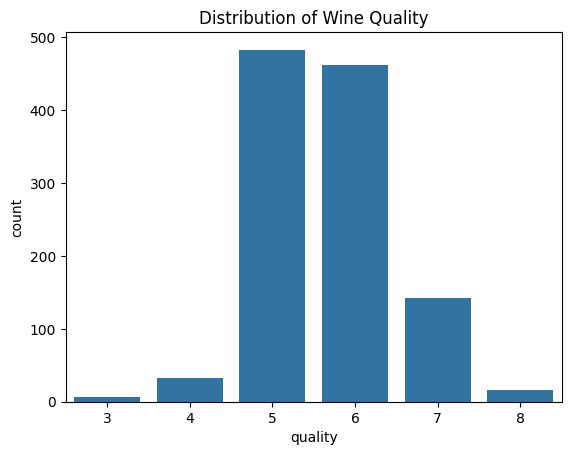

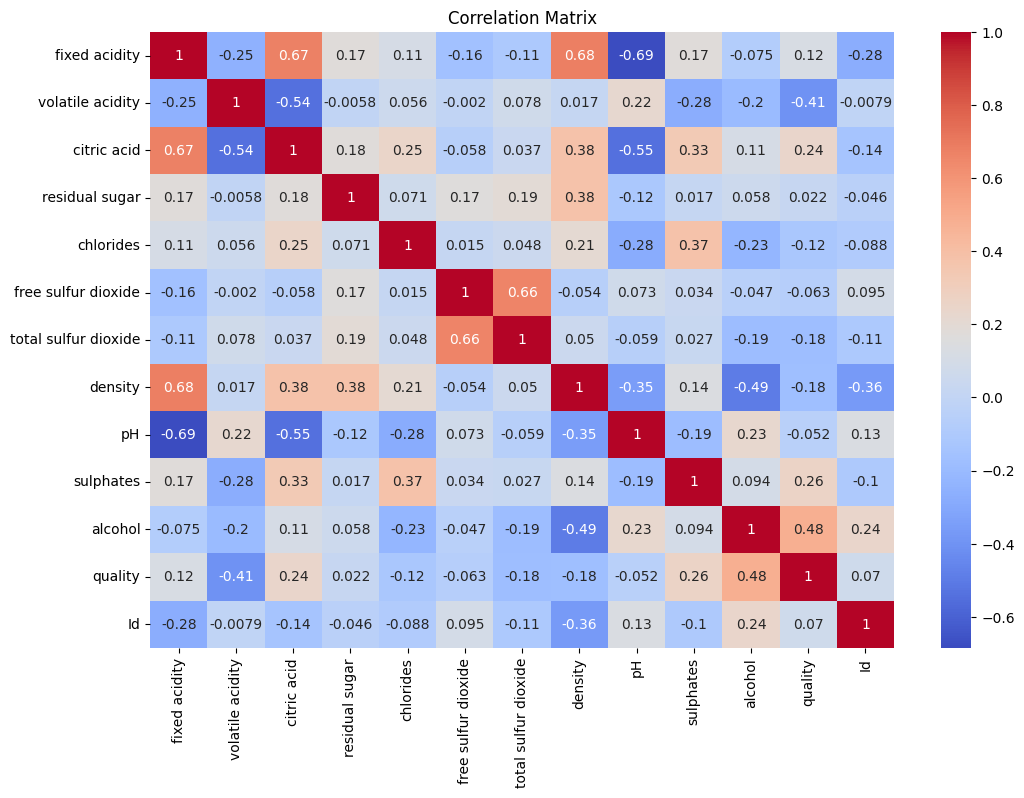

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
# Load the dataset
data = pd.read_csv('/content/WineQT.csv')

# Display the first few rows of the dataset
print(data.head())

# Summary of the dataset
print(data.info())

print("Shape : ",data.shape)
# Check for missing values
print(data.isnull().sum())

# Basic statistics of the dataset
print(data.describe())

# Visualize the distribution of wine quality
sns.countplot(x='quality', data=data)
plt.title('Distribution of Wine Quality')
plt.show()


print("\n\n")
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [4]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Select the features to scale
features = data.drop(['quality', 'Id'], axis=1)

# Fit and transform the features
scaled_features = scaler.fit_transform(features)

# Convert the scaled features back to a DataFrame
scaled_data = pd.DataFrame(scaled_features, columns=features.columns)

# Add the target variable back to the DataFrame
scaled_data['quality'] = data['quality']
scaled_data['Id'] = data['Id']

# Display the first few rows of the scaled dataset
print(scaled_data.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.521580          0.939332    -1.365027       -0.466421  -0.231395   
1      -0.292593          1.941813    -1.365027        0.050060   0.234247   
2      -0.292593          1.273492    -1.161568       -0.171289   0.107253   
3       1.653789         -1.399789     1.483400       -0.466421  -0.252560   
4      -0.521580          0.939332    -1.365027       -0.466421  -0.231395   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.450467             -0.363610  0.555854  1.270695  -0.573658   
1             0.915920              0.643477  0.036165 -0.708928   0.130881   
2            -0.060071              0.246745  0.140103 -0.325775  -0.045254   
3             0.135127              0.429852  0.659792 -0.964363  -0.456235   
4            -0.450467             -0.363610  0.555854  1.270695  -0.573658   

    alcohol  quality  Id  
0 -0.963382        5   0  
1 

In [5]:
# Handle missing values (if any)
data = data.dropna()

# Encode the quality variable as a binary classification problem
data['quality'] = data['quality'].apply(lambda x: 1 if x >= 7 else 0)

# Split the data into features and target variable
X = data.drop('quality', axis=1)
y = data['quality']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Import necessary libraries for model building
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

# Calculate R² value
r2 = r2_score(y_test, y_pred)
print('\nR² value:', r2)


Accuracy: 0.9301310043668122
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       201
           1       0.77      0.61      0.68        28

    accuracy                           0.93       229
   macro avg       0.86      0.79      0.82       229
weighted avg       0.93      0.93      0.93       229

Confusion Matrix:
 [[196   5]
 [ 11  17]]

R² value: 0.3489694385216774


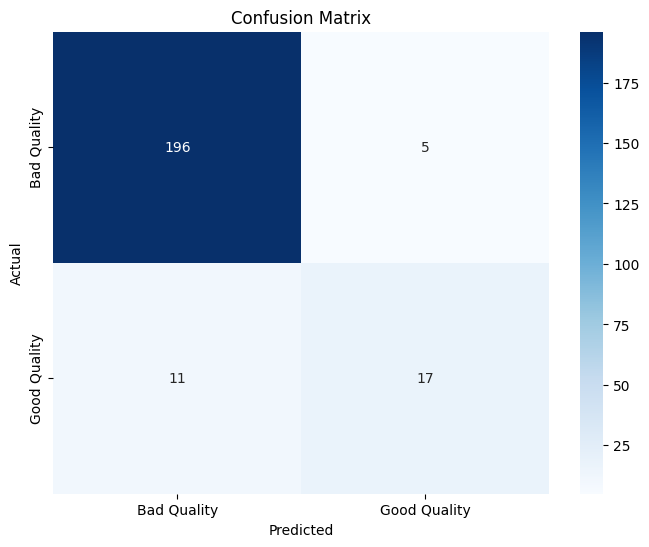

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Bad Quality', 'Good Quality'], yticklabels=['Bad Quality', 'Good Quality'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


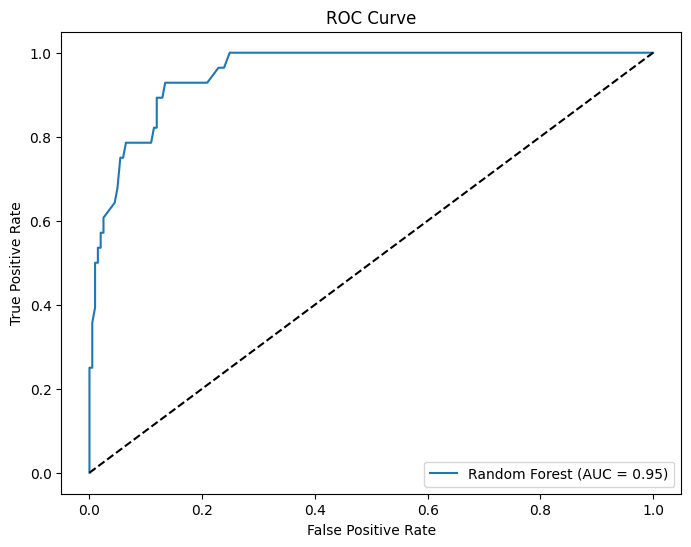

In [9]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Random Forest (AUC = {:.2f})'.format(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()
